https://www.kaggle.com/code/shriharijhawar13/cnn-model-for-sign-language-mnist-dataset#CNN-Model-creation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [3]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [4]:
print(training_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [5]:
print(np.sum(training_data.isna().sum()))
print(np.sum(test_data.isna().sum()))

0
0


In [6]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [7]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [8]:
# X_train = X_train / 255.0

# X_test = X_test / 255.0

In [9]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(27455, 784)

(7172, 784)

(27455,)

(7172,)

<AxesSubplot:xlabel='label', ylabel='Count'>

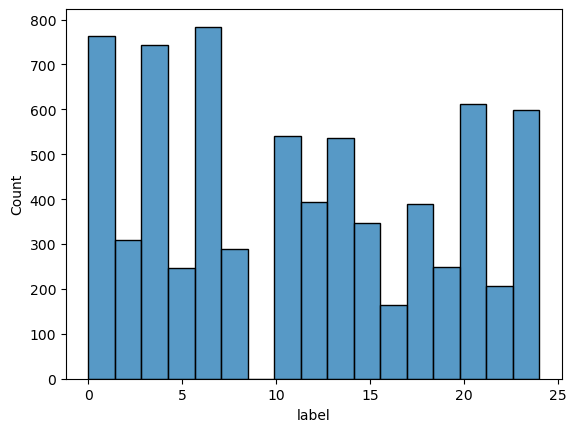

In [10]:
sns.histplot(x=Y_test, data = Y_test)

<AxesSubplot:xlabel='label', ylabel='Count'>

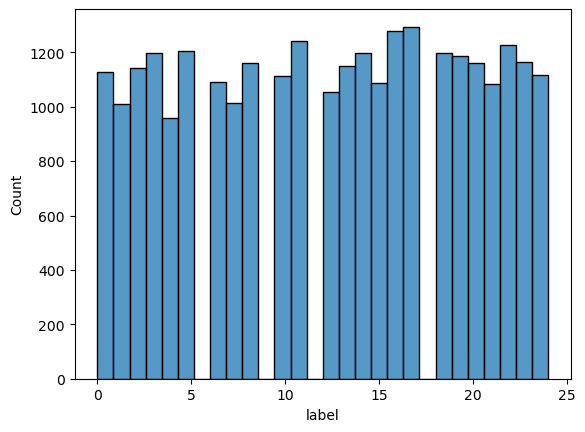

In [11]:
sns.histplot(x=Y_train, data = Y_train)

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

C:\Users\thiba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


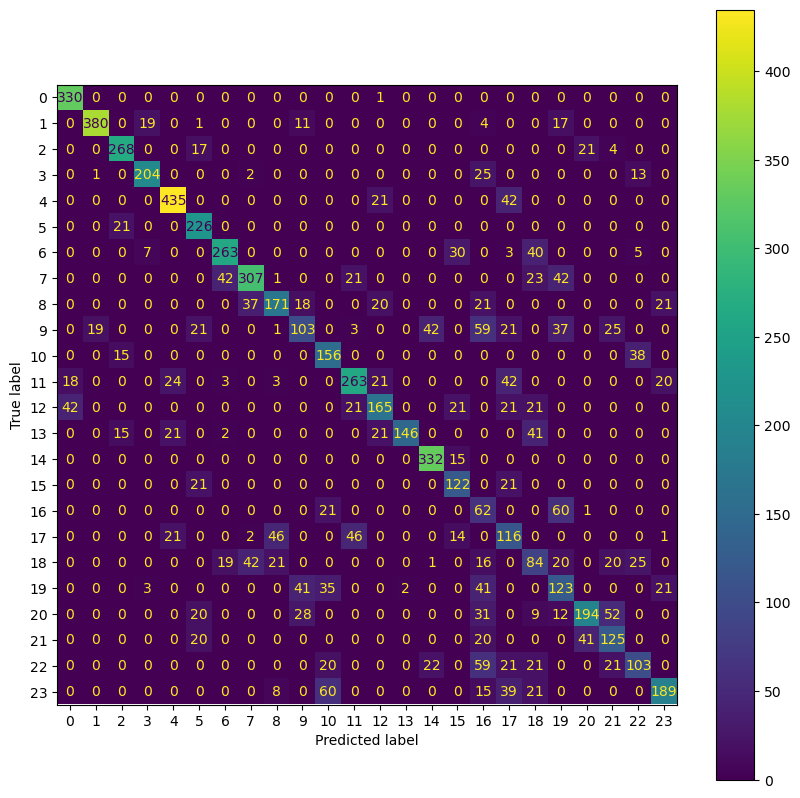

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [14]:
# from sklearn.metrics import precision_score,f1_score

# precision = precision_score(Y_test,Y_pred)
# f1_score = f1_score(Y_test,Y_pred)
# tp,fp,fn,tn=cm.ravel()
# sensibilite = tp/(tp+fn)
# specificite = tn/(tn+fp)

In [15]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_raw_LR = pd.DataFrame.from_dict(report)
score_classification_report_raw_LR=classification_report_raw_LR['macro avg']

In [16]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)


Y_pred = model.predict(X_test)

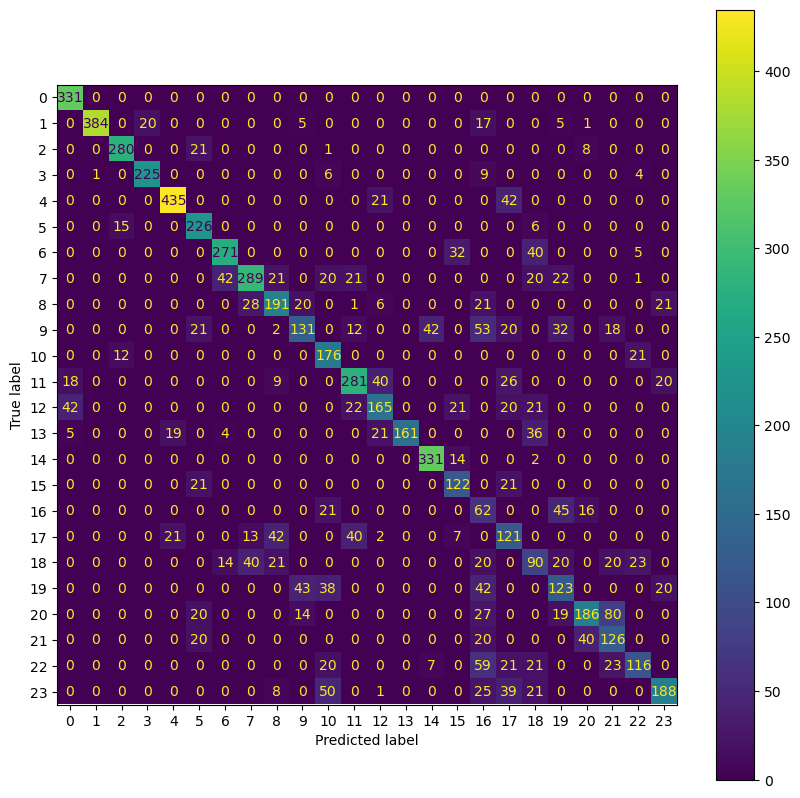

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [19]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_normalize_LR = pd.DataFrame.from_dict(report)
score_classification_report_normalize_LR=classification_report_normalize_LR['macro avg']

**Normaliser permet d'avoir de meilleurs scores et de converger**

**Utiliser Gaussian NB**

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

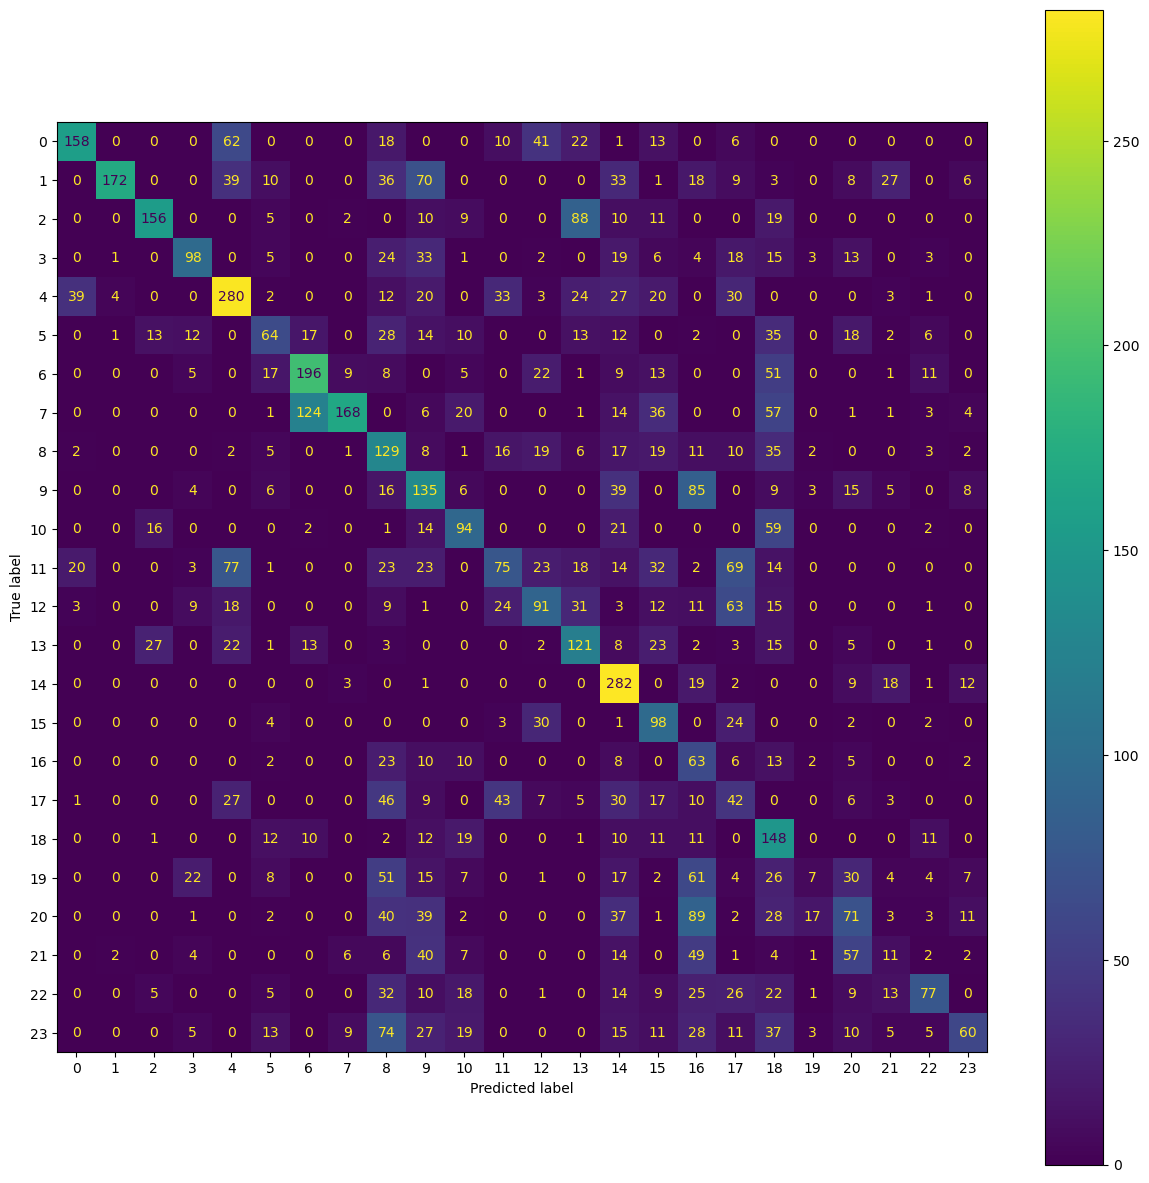

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

# changer la taille de la figure en utilisant la méthode set_size_inches
fig.set_size_inches(15, 15)

In [22]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_NB = pd.DataFrame.from_dict(report)
score_classification_report_NB=classification_report_NB['macro avg']

**Utiliser le decision tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier

# créer un modèle d'arbres de décision
model = DecisionTreeClassifier()

# entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, Y_train)

# prédire des labels pour les données de test
Y_pred = model.predict(X_test)

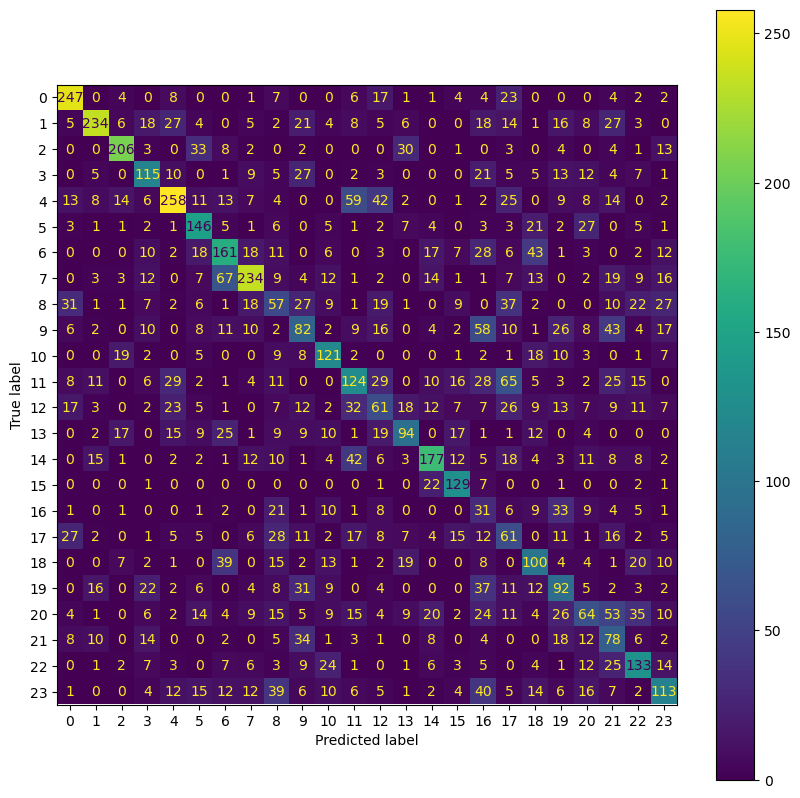

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [25]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_DTC = pd.DataFrame.from_dict(report)
score_classification_report_DTC=classification_report_DTC['macro avg']

**Random Forrest Classfiier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

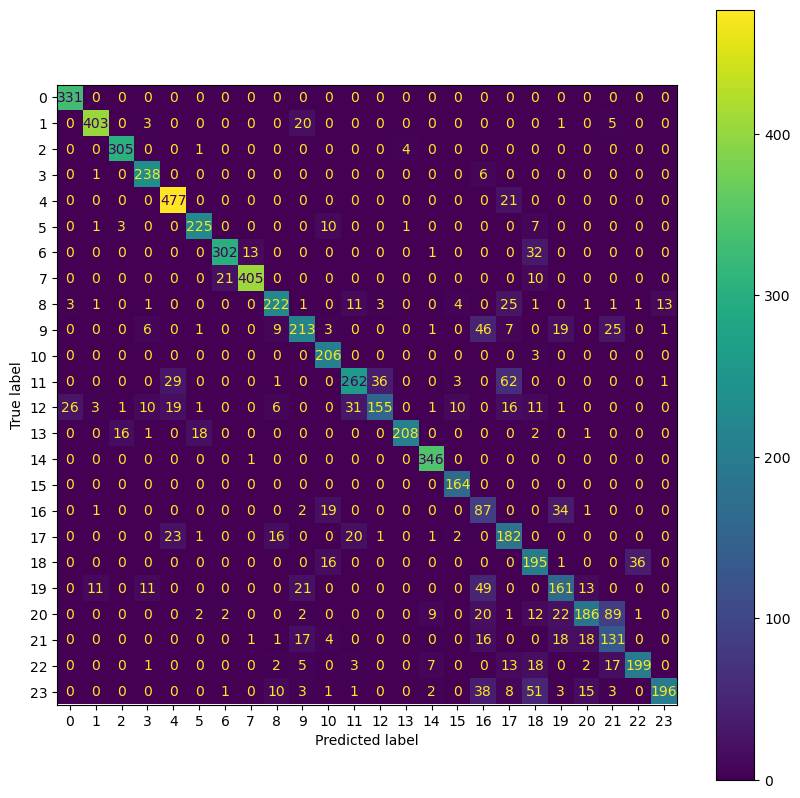

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [28]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_RFC = pd.DataFrame.from_dict(report)
classification_report_RFC
score_classification_report_RFC=classification_report_RFC['macro avg']

In [29]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

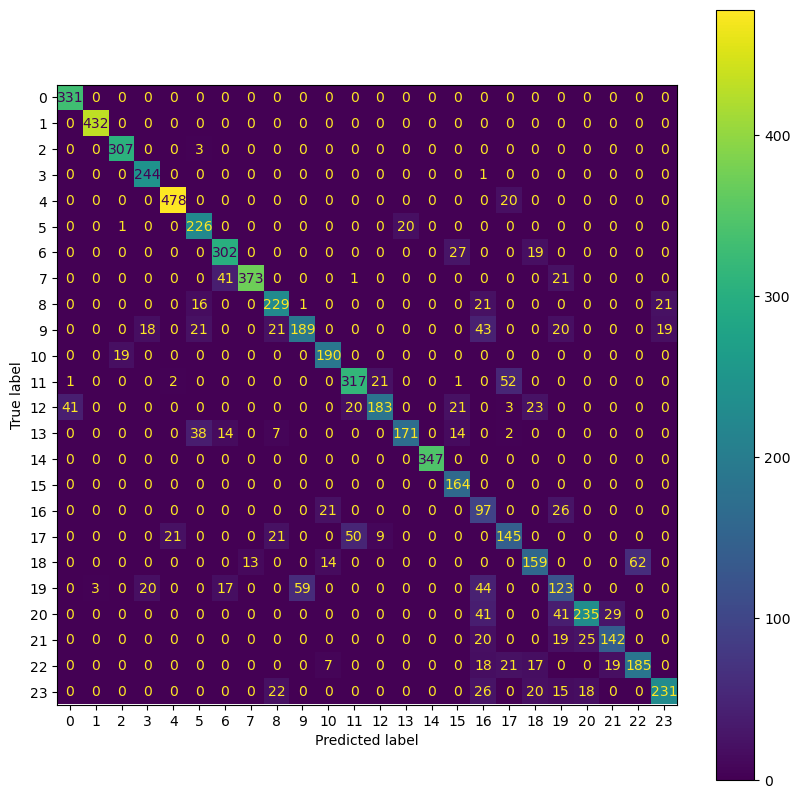

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [31]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_MLPC = pd.DataFrame.from_dict(report)
classification_report_MLPC
score_classification_report_MLPC=classification_report_MLPC['macro avg']

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

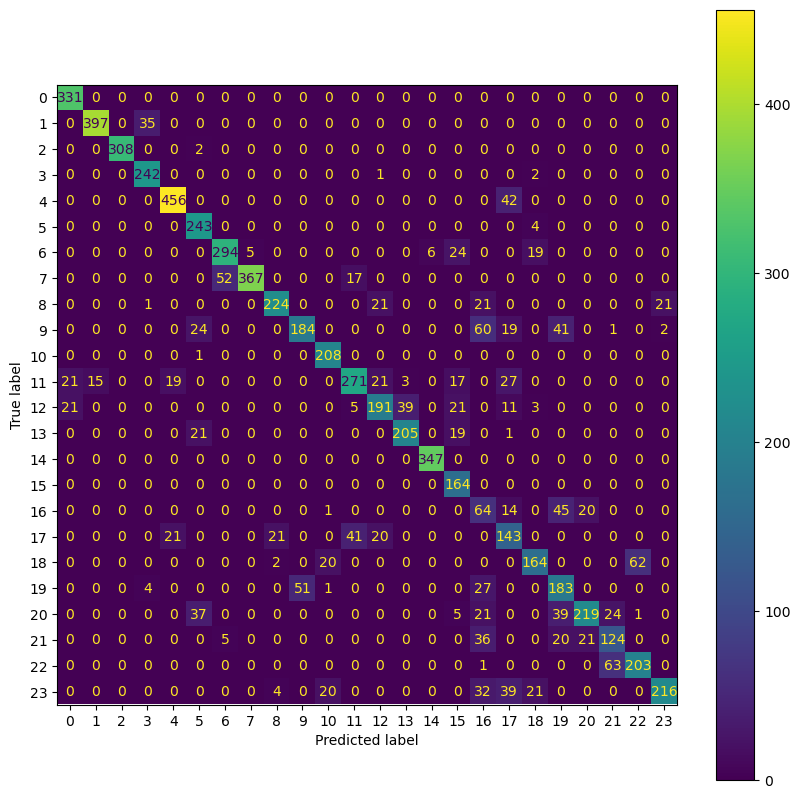

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [34]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC = pd.DataFrame.from_dict(report)
classification_report_BMLPC
score_classification_report_BMLPC=classification_report_BMLPC['macro avg']

**On cherche de meilleurs paramètres**

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les hyperparamètres à tester
parameters = {'hidden_layer_sizes': [(100, 100), (200, 200)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.0001, 0.001]}

# Utiliser la recherche en grille pour sélectionner les meilleurs hyperparamètres
clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
clf.fit(X_train_scaled, Y_train)

# Imprimer les meilleurs hyperparamètres trouvés
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',alpha=0.0001)

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

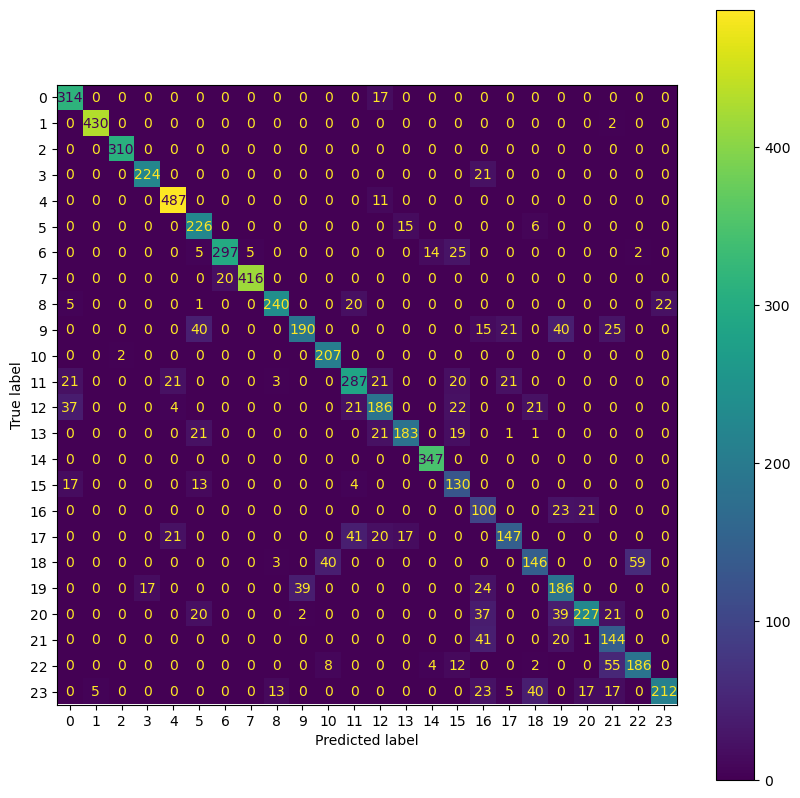

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [38]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC2 = pd.DataFrame.from_dict(report)
classification_report_BMLPC2
score_classification_report_BMLPC2=classification_report_BMLPC2['macro avg']

**Pas vraiment de meilleurs résultats**

In [39]:
# In this step we are dividing the dataset in to X and Y training values
# X contains information about the images 
# Y contains the correspondind label of that image
# These two values will be used to train the model
#creating our X for the training data
x_train = training_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_train = training_data["label"]

# In this step we are dividing the dataset in to X and Y test values
# X contains information about the images
# Y contains the correspondind label of that image
# These two values will be used to test the model
#creating our X for the training data
x_test = test_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_test = test_data["label"]

In [40]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [41]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [42]:
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
epochs = 13
batch_size = 128
model_history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/13
215/215 [==============================] - 5s 22ms/step - loss: 3.1225 - accuracy: 0.1074
Epoch 2/13
215/215 [==============================] - 6s 26ms/step - loss: 1.9287 - accuracy: 0.3811
Epoch 3/13
215/215 [==============================] - 5s 23ms/step - loss: 1.0487 - accuracy: 0.6348
Epoch 4/13
215/215 [==============================] - 5s 22ms/step - loss: 0.6692 - accuracy: 0.7658
Epoch 5/13
215/215 [==============================] - 5s 23ms/step - loss: 0.4600 - accuracy: 0.8398
Epoch 6/13
215/215 [==============================] - 5s 22ms/step - loss: 0.3413 - accuracy: 0.8820
Epoch 7/13
215/215 [==============================] - 5s 22ms/step - loss: 0.2511 - accuracy: 0.9154
Epoch 8/13
215/215 [==============================] - 5s 23ms/step - loss: 0.1958 - accuracy: 0.9350
Epoch 9/13
215/215 [==============================] - 5s 22ms/step - loss: 0.1590 - accuracy: 0.9484
Epoch 10/13
215/215 [==============================] - 5s 23ms/step - loss: 0.1286 - accura

In [45]:
pred = model.predict(x_test)

225/225 [==============================] - 1s 2ms/step


In [46]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

(27455,)

(7172,)

(7172, 26)

In [47]:
# Convertir les probabilités de classe en prédictions de classe
y_pred = np.argmax(pred, axis=1)

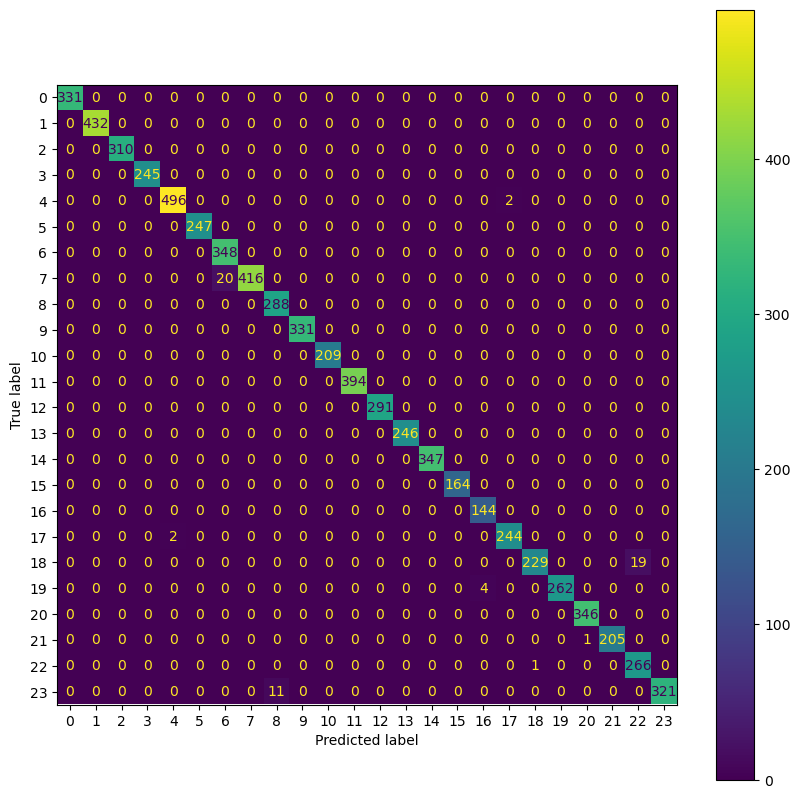

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
classification_report_CNN
score_classification_report_CNN=classification_report_CNN['macro avg']

In [50]:
# Obtenir un dictionnaire contenant toutes les variables globales
global_vars = globals()

# Filtrer les variables ayant un nom commençant par classification_report_
classification_report_vars = [v for k, v in global_vars.items() if k.startswith('score_classification_')]

# Imprimer les variables
for var in classification_report_vars:
    print(var)


precision       0.668372
recall          0.659496
f1-score        0.653546
support      7172.000000
Name: macro avg, dtype: float64
precision       0.690512
recall          0.682157
f1-score        0.675321
support      7172.000000
Name: macro avg, dtype: float64
precision       0.424823
recall          0.384098
f1-score        0.369259
support      7172.000000
Name: macro avg, dtype: float64
precision       0.431412
recall          0.432186
f1-score        0.425755
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801793
recall          0.801610
f1-score        0.792958
support      7172.000000
Name: macro avg, dtype: float64
precision       0.792753
recall          0.796330
f1-score        0.787179
support      7172.000000
Name: macro avg, dtype: float64
precision       0.786777
recall          0.792230
f1-score        0.781750
support      7172.000000
Name: macro avg, dtype: float64
precision       0.795477
recall          0.797124
f1-score        0.788414
s

In [54]:
pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\thiba\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.

